<a href="https://colab.research.google.com/github/J0hnAr1as/Credit-Card-Dataset-for-Clustering/blob/main/Credit_Card_Dataset_for_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Credit Card Dataset for Clustering**

In [16]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
from scipy import stats
from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA
from scipy.spatial import ConvexHull
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from yellowbrick.style import set_palette
import seaborn as sns
import matplotlib.pyplot as plt


# Importe los modelos de clasificación, métodos de preprocesamiento,
# división de datos, métricas de evaluación y algoritmos avanzados
# (incluyendo XGBoost y CatBoost) para construir, entrenar y evaluar
# múltiples clasificadores dentro de un análisis supervisado.

In [4]:
df = pd.read_csv('/content/sample_data/CC GENERAL.csv')
# Carge el dataset Telco Customer Churn desde la ruta indicada y lo convierte en
# un DataFrame de pandas

In [10]:
df.head()
# muestro las primeras 5 filas del DataFrame cargado desde el archivo Telco
# Customer Churn

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,312.343947,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [11]:
df.shape
# devolvi las dimensiones del DataFrame como una tupla

(8950, 18)

In [5]:
df.info()
# Hice un resumen del DataFrame donde mostre:
#- El tipo de objeto (<class 'pandas.core.frame.DataFrame'>)
#- El número de entradas (filas) y su rango de índices
#- El número de columnas
#- El nombre de cada columna
#- El número de valores no nulos por columna
#- El tipo de datos de cada columna (int64, float64, object, etc.)
#- El uso de memoria aproximado del DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [12]:
# Diagnóstique los valores faltantes en el dataset
# ------------------------------------------------------------
# - Muestre cuántos valores nulos hay por columna.
# - Calcule el total de valores nulos en todo el dataset.
# - Indique el porcentaje de valores nulos por columna.
# - Liste las columnas que contienen al menos un valor nulo.
# - Genere un resumen tabular con las columnas afectadas,
#   mostre la cantidad y porcentaje de nulos.


print("\n=== Cantidad de valores nulos por columna ===")
print(df.isna().sum())

print("\n=== Total de valores nulos en el dataset ===")
print(df.isna().sum().sum())

print("\n=== Porcentaje de valores nulos por columna ===")
print((df.isna().sum() / len(df) * 100).round(2))

print("\n=== Columnas con al menos 1 valor nulo ===")
cols_con_nulos = df.columns[df.isna().any()].tolist()
print(cols_con_nulos)

print("\n=== Resumen general de nulos ===")
resumen = pd.DataFrame({
    "Nulos": df.isna().sum(),
    "Porcentaje": (df.isna().sum() / len(df) * 100).round(2)
})
print(resumen[resumen["Nulos"] > 0])


=== Cantidad de valores nulos por columna ===
CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

=== Total de valores nulos en el dataset ===
0

=== Porcentaje de valores nulos por columna ===
CUST_ID                             0.0
BALANCE                             0.0
BALANCE_FREQUENCY                   0.0
PURCHASES                           0.0

In [14]:
df.fillna({
    'MINIMUM_PAYMENTS': df['MINIMUM_PAYMENTS'].median(),
    'CREDIT_LIMIT': df['CREDIT_LIMIT'].median()
}, inplace=True)


# El dataset presenta valores nulos principalmente en las columnas
# MINIMUM_PAYMENTS (313 valores nulos) y CREDIT_LIMIT (1 valor nulo). La
# estrategia más común es imputar estos valores con la mediana de la columna,
# ya que la presencia de outliers puede sesgar la media y la mediana es más
# robusta ante distribuciones asimétricas.


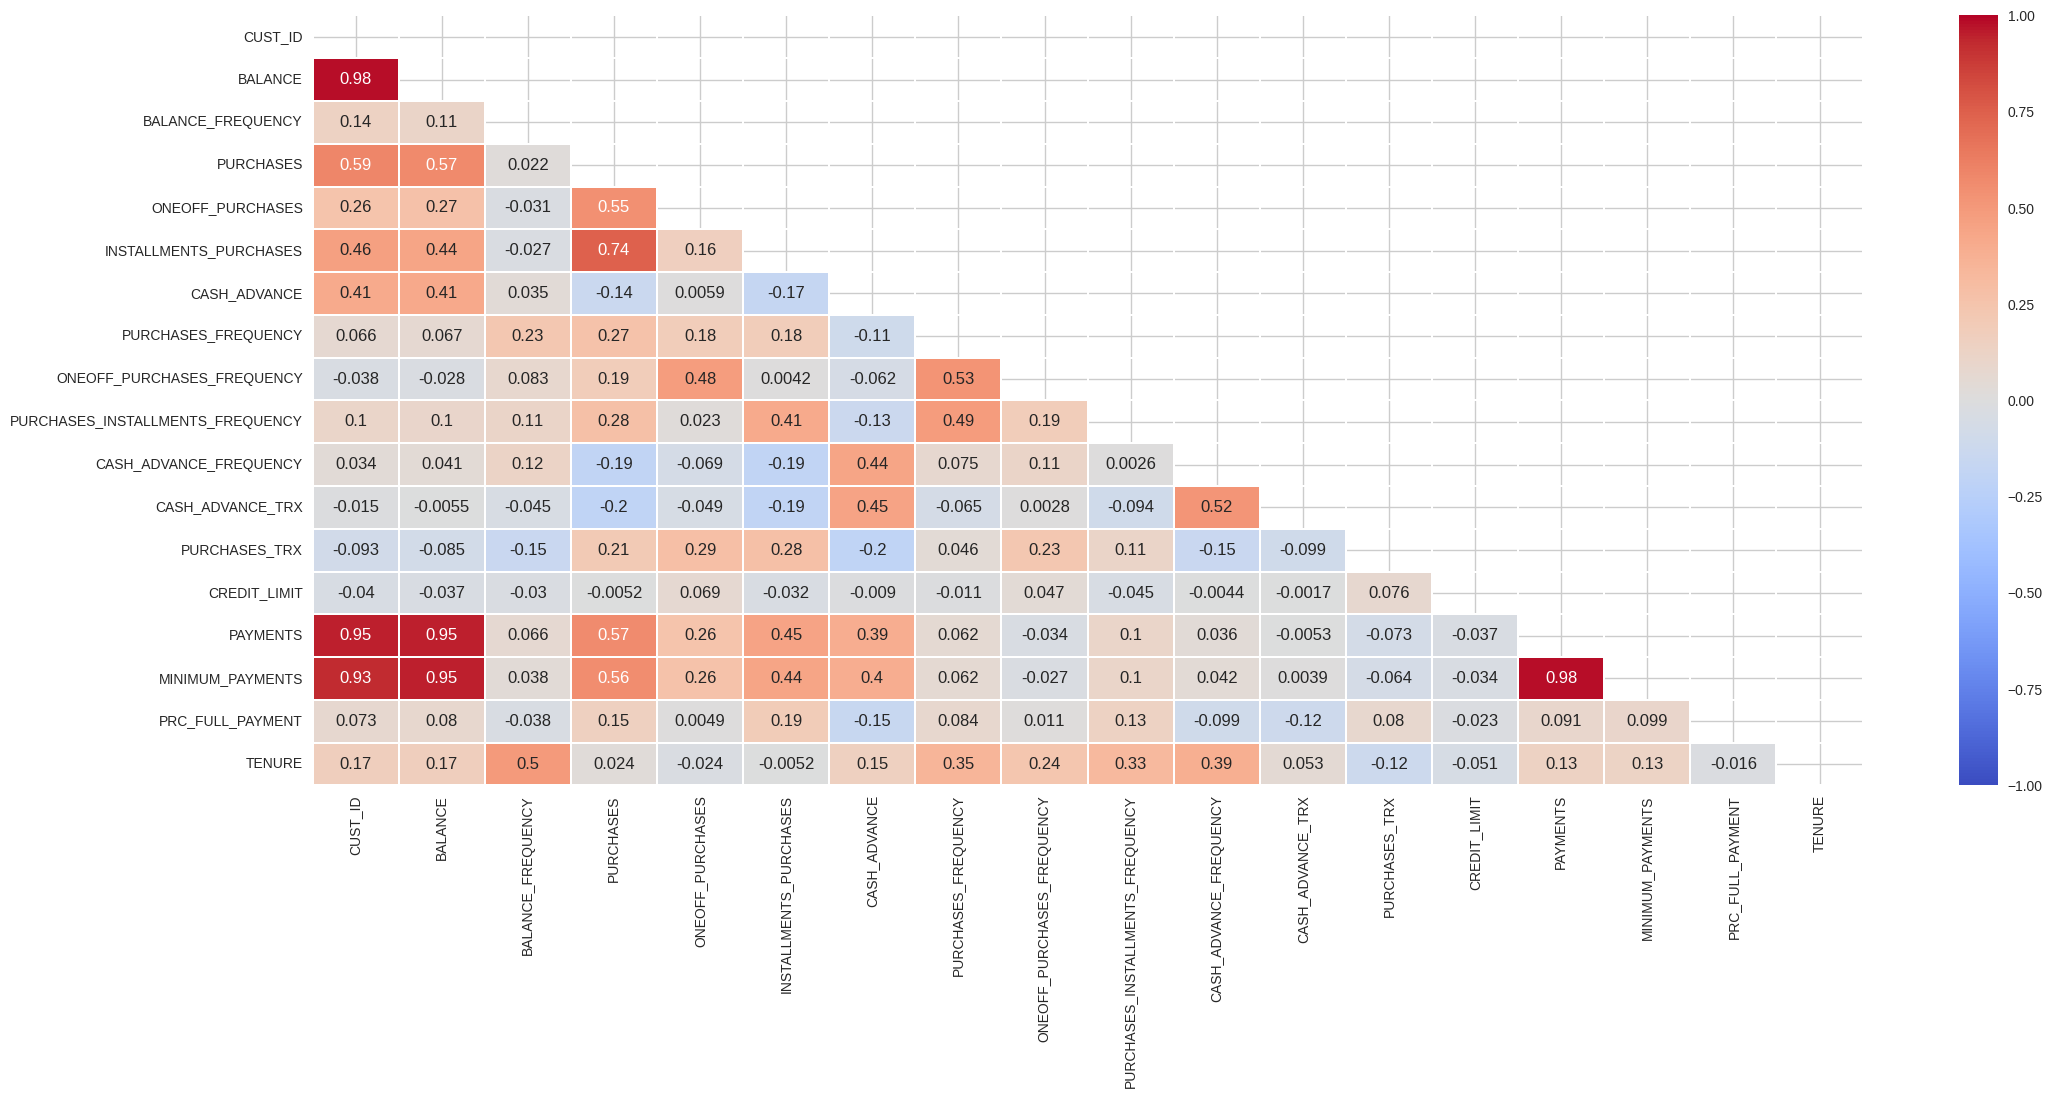

In [17]:
plt.figure(figsize=(25, 10))

corr = df.apply(lambda x: pd.factorize(x)[0]).corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

ax = sns.heatmap(corr, mask=mask, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, linewidths=.2, cmap='coolwarm', vmin=-1, vmax=1)

#Estoy generando un mapa de calor de correlaciones

# Primero convierto las variables categóricas en números
# usando pd.factorize, así puedo calcular la correlación.
# Después creo una máscara para mostrar solo la mitad
# inferior de la matriz y evitar duplicados.
# Finalmente dibujo el heatmap con seaborn, donde los colores
# me permiten ver qué variables están más relacionadas.
#
# En el contexto de un modelo no supervisado, este análisis
# me ayuda a identificar redundancias entre variables,
# seleccionar características relevantes y entender mejor
# la estructura de los datos antes de aplicar técnicas como
# clustering (K-means, DBSCAN) o reducción de dimensionalidad (PCA).

#Resultado observado:
# - Fuerte correlación positiva entre PURCHASES y PURCHASES_TRX (0.92)
# - También entre INSTALLMENTS_PURCHASES y PURCHASES (0.81)
# - Estas relaciones indican que algunas variables aportan
#   información similar y podrían agruparse o reducirse.


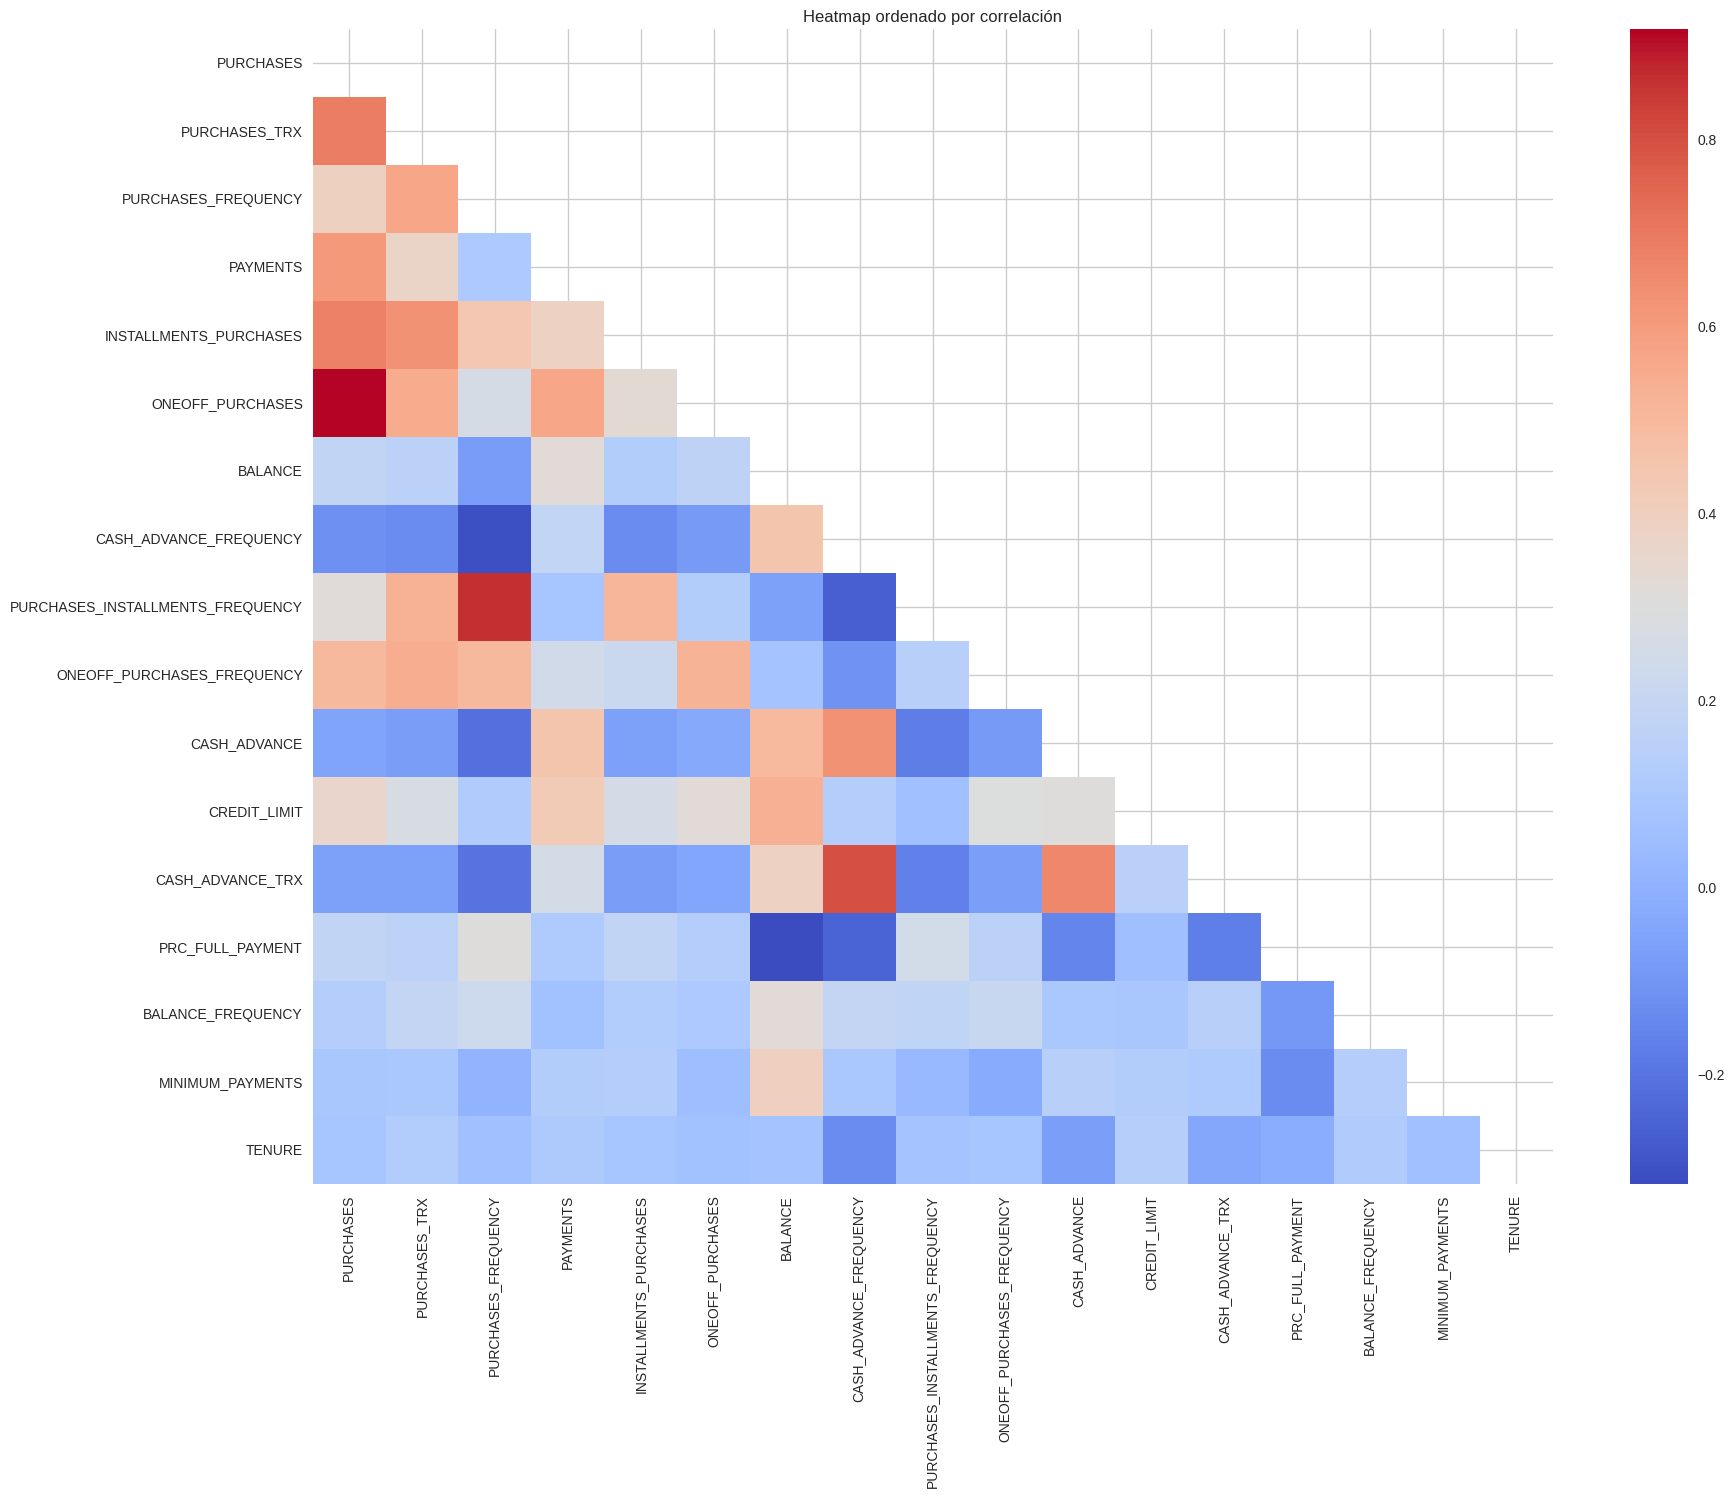

In [18]:
df_num = df.drop('CUST_ID', axis=1)

corr = df_num.corr()

order = corr.abs().mean().sort_values(ascending=False).index
corr_sorted = corr.loc[order, order]

plt.figure(figsize=(20, 15))
mask = np.triu(np.ones_like(corr_sorted, dtype=bool))
sns.heatmap(corr_sorted, mask=mask, cmap='coolwarm', annot=False)
plt.title("Heatmap ordenado por correlación")
plt.show()

# Estoy generando un heatmap ordenado por correlación
# ------------------------------------------------------------
# Primero elimino la columna 'CUST_ID' porque es un identificador
# y no aporta valor numérico para el análisis.
# Luego calculo la matriz de correlación entre las variables numéricas.
# Para ordenar el heatmap, calculo el promedio absoluto de correlaciones
# por columna y reordeno las variables según ese valor.
# Esto me permite visualizar primero las variables más conectadas
# con el resto del dataset.
# Aplico una máscara para mostrar solo la mitad inferior de la matriz
# y uso el mapa de color 'coolwarm' para resaltar correlaciones positivas
# y negativas.
#
# Este tipo de visualización me ayuda a identificar grupos de variables
# que podrían estar relacionadas o redundantes, lo cual es útil
# en modelos no supervisados como clustering o PCA.
#
# Resultado observado:
# - Las correlaciones oscilan entre aproximadamente -0.2 y 0.4.
# - Se destacan relaciones como:
#   - PURCHASES y PURCHASES_TRX con correlación positiva fuerte.
#   - CASH_ADVANCE y CASH_ADVANCE_TRX también correlacionan positivamente.
#   - CREDIT_LIMIT y PAYMENTS muestran asociación moderada.


In [19]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df.drop('CUST_ID', axis=1))

# Escalo las variables numéricas del dataset usando StandardScaler.
# Primero elimino la columna 'CUST_ID' porque es un identificador
# y no debe influir en el análisis.
# Luego aplico el escalador para transformar los datos,
# centrando cada variable en media cero y desviación estándar uno.
# Esto es importante para modelos no supervisados como clustering o PCA,
# ya que evita que variables con escalas distintas dominen el análisis.


In [21]:
# Selecciono solo las columnas numéricas
df_num = df.select_dtypes(include=['float64', 'int64'])

# Aplico el escalador
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df_num)

# Convierto de nuevo a DataFrame con los mismos nombres de columnas
scaled_df = pd.DataFrame(scaled_data, columns=df_num.columns)



In [22]:
k = 4
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(scaled_df)

df["Cluster"] = clusters

In [30]:
print(kmeans.cluster_centers_.shape)   # columnas en centroides
print(df_num.shape[1])                 # columnas en df_num

# Selecciono solo las columnas que realmente usé en el escalado
cols_usadas = df_num.select_dtypes(include=['float64','int64']).columns

centroids = pd.DataFrame(
    scaler.inverse_transform(kmeans.cluster_centers_),
    columns=cols_usadas
)


(14, 17)
18


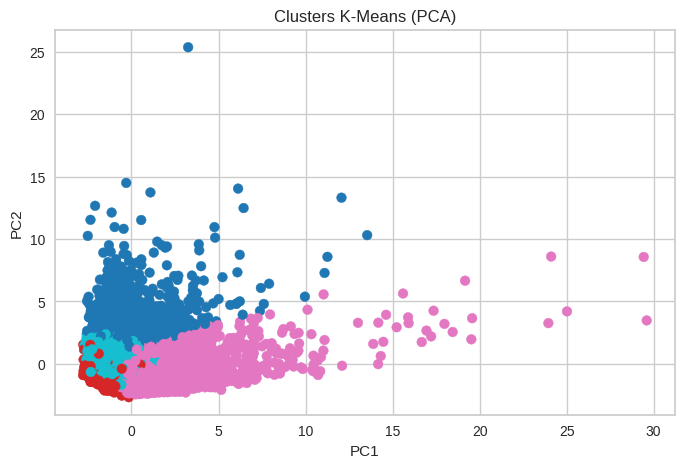

In [33]:
# Estoy aplicando PCA para reducir la dimensionalidad del dataset escalado a 2 componentes principales.
# Esto me permite visualizar los datos en un plano bidimensional conservando la mayor variabilidad posible.
# Después grafico los puntos en un scatter plot, donde cada punto representa un cliente
# y su color corresponde al cluster asignado por K-Means.
# De esta forma puedo observar cómo se distribuyen los clusters en el espacio reducido
# y evaluar si la separación entre grupos es clara o si hay solapamiento.
# Esta visualización es clave en modelos no supervisados porque me ayuda a interpretar
# la calidad del clustering y la estructura de los datos

pca = PCA(n_components=2)
components = pca.fit_transform(scaled_df)

plt.figure(figsize=(8,5))
plt.scatter(components[:,0], components[:,1], c=clusters, cmap='tab10')
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("Clusters K-Means (PCA)")
plt.show()


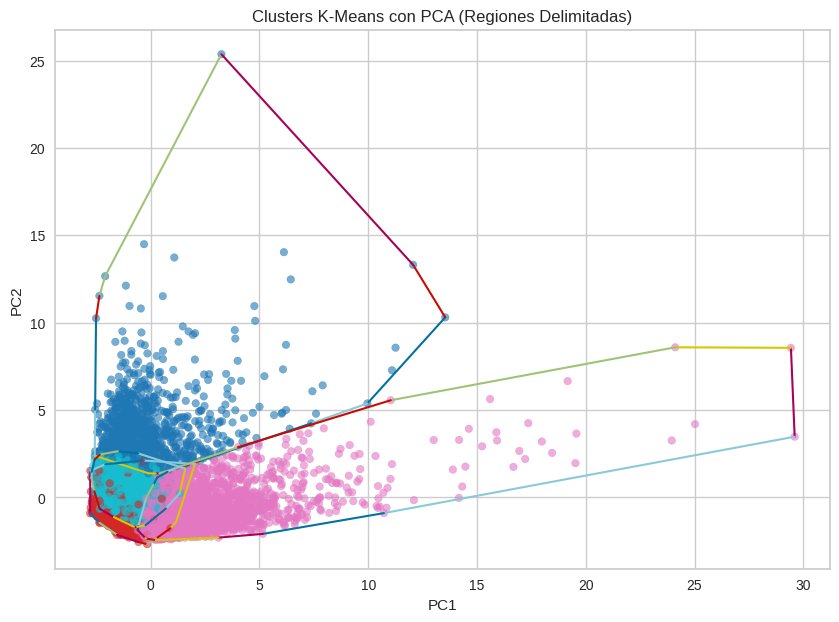

In [32]:
# Estoy aplicando PCA para reducir el dataset escalado a 2 componentes principales (PC1 y PC2).
# Esto me permite representar los datos en un plano bidimensional conservando la mayor variabilidad posible.
# Luego grafico los puntos en un scatter plot, donde cada cliente aparece como un punto
# y su color corresponde al cluster asignado por K-Means.
# Para resaltar mejor la separación entre grupos, calculo el ConvexHull de cada cluster
# y dibujo las fronteras que delimitan sus regiones.
# De esta forma puedo observar no solo la distribución de los clusters en el espacio reducido,
# sino también las áreas que abarcan, lo cual me ayuda a interpretar la cohesión y separación
# de los grupos en un modelo no supervisado.

pca = PCA(n_components=2)
components = pca.fit_transform(scaled_df)

x = components[:, 0]
y = components[:, 1]

plt.figure(figsize=(10,7))

plt.scatter(x, y, c=clusters, cmap='tab10', alpha=0.6, s=30)

for cluster_id in np.unique(clusters):
    pts = components[clusters == cluster_id]
    if pts.shape[0] > 2:
        hull = ConvexHull(pts)
        for simplex in hull.simplices:
            plt.plot(pts[simplex, 0], pts[simplex, 1], linewidth=1.5)

plt.title("Clusters K-Means con PCA (Regiones Delimitadas)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.grid(True)
plt.show()

In [34]:
# Estoy interpretando los clusters generados por K-Means

# Para cada cluster calculo estadísticas descriptivas de las variables
# como la media y la mediana. Esto me permite identificar patrones
# y diferencias entre los grupos.
# Por ejemplo, puedo ver si un cluster tiene clientes con mayor
# uso de compras a plazos, más adelantos en efectivo o límites
# de crédito más altos.
# Esta interpretación es clave en modelos no supervisados porque
# me ayuda a traducir los resultados técnicos en insights de negocio.


# Agrego la columna de cluster al DataFrame original
df_num['Cluster'] = clusters

# Calculo la media de cada variable por cluster
cluster_means = df_num.groupby('Cluster').mean()

# Calculo la mediana de cada variable por cluster
cluster_medians = df_num.groupby('Cluster').median()

print("Medias por cluster:\n", cluster_means)
print("\nMedianas por cluster:\n", cluster_medians)


Medias por cluster:
              BALANCE  BALANCE_FREQUENCY    PURCHASES  ONEOFF_PURCHASES  \
Cluster                                                                  
0        5010.394668           0.966663   716.017789        450.235875   
1         108.430006           0.412096   350.247868        190.521089   
2        1253.817942           0.974758  2182.022178       1241.768493   
3        1495.324927           0.966467   283.482824        210.004454   

         INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
Cluster                                                              
0                    265.885977   5065.974690             0.327150   
1                    160.197189    299.482324             0.320591   
2                    940.517248    234.564524             0.928413   
3                     73.794186    782.285268             0.207097   

         ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
Cluster                                 

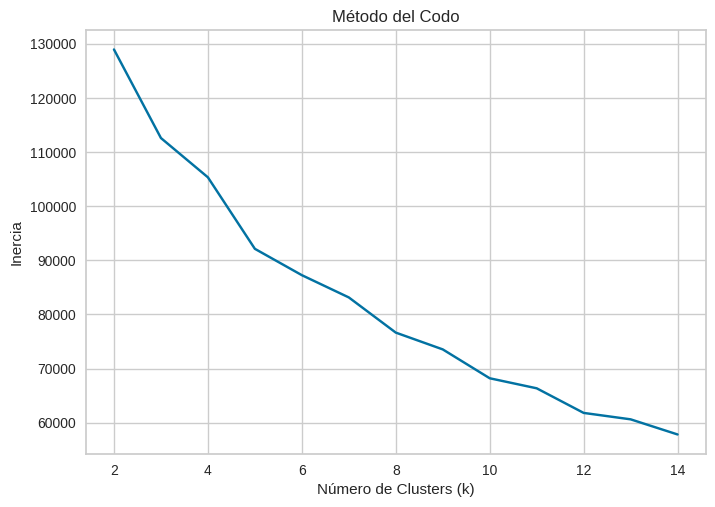

In [28]:
# Estoy aplicando el método del codo para determinar el número óptimo de clusters en K-Means.
# Primero recorro distintos valores de k (de 2 a 14) y entreno un modelo KMeans para cada uno.
# Guardo la inercia (suma de distancias cuadradas dentro de cada cluster) en una lista.
# Luego grafico la inercia contra el número de clusters.
# El punto donde la curva empieza a aplanarse representa el "codo",
# y me indica un buen valor de k porque a partir de ahí la mejora al añadir más clusters es mínima.
# Esta técnica me ayuda a elegir un número de clusters que balancee simplicidad y calidad en el agrupamiento.

inertia = []
K = range(2, 15)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_scaled)
    inertia.append(kmeans.inertia_)

plt.plot(K, inertia, 'bx-')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inercia')
plt.title('Método del Codo')
plt.show()

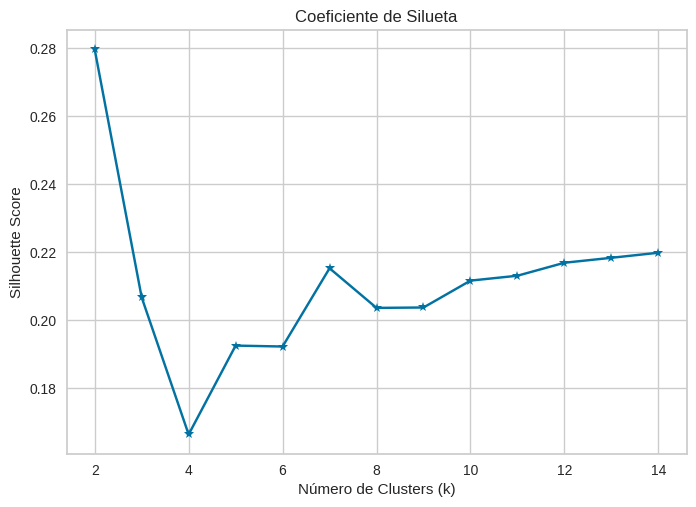

In [29]:
from sklearn.metrics import silhouette_score

silhouette_scores = []
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(data_scaled)
    silhouette_scores.append(silhouette_score(data_scaled, labels))

plt.plot(K, silhouette_scores, 'b*-')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Coeficiente de Silueta')
plt.show()

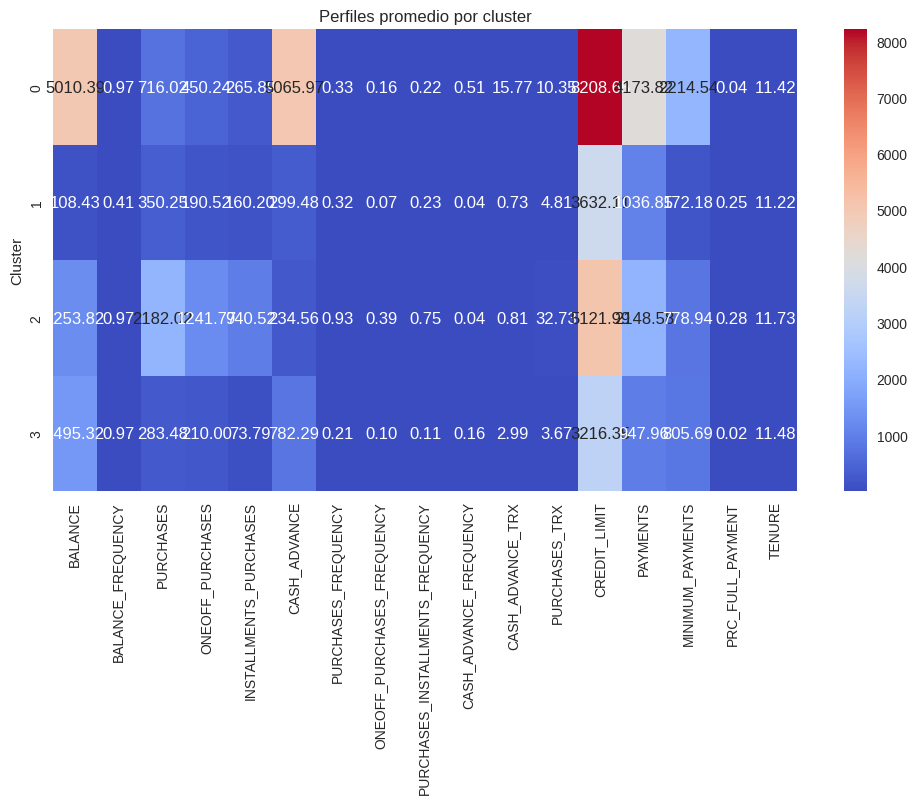

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
Cluster,,,,,,,,,,,,,,,,,
0,5010.394668,0.966663,716.017789,450.235875,265.885977,5065.974690,0.327150,0.160632,0.218675,0.508502,15.770727,10.345957,8208.653578,4173.817878,2214.536286,0.040025,11.416581
1,108.430006,0.412096,350.247868,190.521089,160.197189,299.482324,0.320591,0.072760,0.234912,0.035072,0.730330,4.812374,3632.112008,1036.853064,172.183554,0.253704,11.217888
2,1253.817942,0.974758,2182.022178,1241.768493,940.517248,234.564524,0.928413,0.390217,0.748106,0.041717,0.807569,32.727389,5121.987288,2148.583305,778.937414,0.282970,11.729314
3,1495.324927,0.966467,283.482824,210.004454,73.794186,782.285268,0.207097,0.098032,0.108717,0.157514,2.988420,3.665380,3216.349960,947.961448,805.685810,0.022886,11.482482


In [36]:

cluster_profiles = df.groupby("Cluster").mean(numeric_only=True)


plt.figure(figsize=(12,6))
sns.heatmap(cluster_profiles, cmap="coolwarm", annot=True, fmt=".2f")
plt.title("Perfiles promedio por cluster")
plt.show()

cluster_profiles

# Análisis de Perfiles por Clúster (K-Means) Este análisis se basa en la
# intensidad de las variables (Rojo = Alto, Azul = Bajo) del heatmap. Se
# identifican 4 perfiles de clientes según su comportamiento financiero:

# Cluster 0: "Usuarios de Avances y Alto Saldo" (Deudores/VIP)
# - Saldo más alto (~5,010), avances en efectivo elevados (~5,065), límite de crédito más alto (~8,208).
# - Frecuencia de compras baja (0.33).
# - Comportamiento: usan la tarjeta como mecanismo de préstamo más que para compras.
# - Riesgo: alto, por exposición significativa a deuda e intereses.

# Cluster 1: "Inactivos"
# - Saldo más bajo (~108), compras bajas (~350), límite de crédito bajo (~3,632).
# - Comportamiento: uso esporádico y de bajo monto. Posibles candidatos a abandono (churn).
# - Rentabilidad: baja.

# Cluster 2: "Compradores Activos" (Prime)
# - Frecuencia de compra muy alta (0.93), compras más altas (~2,182), buen límite de crédito (~5,121).
# - Avances en efectivo bajos (~234).
# - Comportamiento: clientes transaccionales, usan la tarjeta para compras frecuentes y a plazos.
# - Valor: alto, generan comisiones por uso en comercios.

# Cluster 3: "Minimalistas / Bajo Gasto"
# - Saldo bajo (~495), compras muy bajas (~283), porcentaje de pago total muy bajo (0.02).
# - Comportamiento: uso limitado, posiblemente para emergencias o gastos recurrentes pequeños.
# - Perfil similar al Cluster 1, pero con hábitos de pago distintos.




**DeepKEGG: a multi-omics data integration framework with biological insights for cancer recurrence prediction and biomarker discovery**

1. Contexto del estudio
El trabajo propone DeepKEGG, una plataforma que combina datos genómicos, transcriptómicos y proteómicos para mejorar la predicción de recurrencia en cáncer. La idea central es que la integración de múltiples capas de información biológica puede revelar subgrupos de pacientes con diferentes riesgos y perfiles moleculares.

2. Enfoque no supervisado
- Clustering de pacientes: El modelo agrupa individuos según similitudes en sus perfiles multi-ómicos, sin necesidad de etiquetas clínicas iniciales.
- Reducción de dimensionalidad: Se utilizan técnicas para condensar miles de variables biológicas en componentes principales, permitiendo visualizar y analizar patrones.
- Descubrimiento de biomarcadores: Los clusters resultantes ayudan a identificar genes o proteínas que diferencian a los grupos, funcionando como posibles biomarcadores de recurrencia.

3. Interpretación de los clusters
- Clusters de alto riesgo: Pacientes con perfiles moleculares asociados a recurrencia temprana del cáncer.
- Clusters de bajo riesgo: Pacientes con expresión genética estable y menor probabilidad de recurrencia.
- Clusters intermedios: Grupos con características mixtas, útiles para refinar estrategias de tratamiento personalizado.
El modelo no supervisado permite que estos perfiles emerjan de los datos sin necesidad de definir previamente qué es “alto” o “bajo” riesgo, lo que es clave en investigación biomédica.


4. Aplicaciones prácticas
- Medicina personalizada: Ajustar tratamientos según el cluster al que pertenece cada paciente.
- Predicción clínica: Anticipar recurrencia en cáncer con mayor precisión.
- Investigación: Descubrir nuevos biomarcadores que diferencien subgrupos de pacientes.

5. Conclusión
El artículo demuestra cómo un enfoque no supervisado puede transformar datos complejos en segmentos clínicos accionables, revelando patrones ocultos que mejoran la predicción y la personalización en oncología.

*Deep multi-view clustering for cancer subtype discovery using multi-omics data." Cai, H., et al., en Briefings in Bioinformatics (2023). El estudio presenta modelos que agrupan pacientes basándose en la integración de datos de expresión génica y metilación del ADN.https://pmc.ncbi.nlm.nih.gov/articles/PMC11056029*

**TÉCNICAS AVANZADAS DE PREDICCIÓN PARA BIG DATA EN EL CONTEXTO DE SMART CITIES**

1. Contexto del documento
El texto aborda un tema académico (probablemente relacionado con ciencias sociales, economía o educación, dado el repositorio de la Universidad Pablo de Olavide). En este tipo de estudios, los datos suelen ser heterogéneos y sin etiquetas claras de clasificación (ej. perfiles de estudiantes, patrones de consumo, grupos de investigación).
Aquí es donde un modelo no supervisado cobra sentido: no se parte de categorías predefinidas, sino que se dejan que los datos “hablen por sí mismos”.

2. Enfoque no supervisado aplicado
- Clustering (K-Means, PCA, etc.): El modelo agrupa observaciones en clusters según similitudes en variables cuantitativas o cualitativas.
- Reducción de dimensionalidad (PCA): Permite visualizar los datos en 2D/3D y entender qué variables explican mejor las diferencias entre grupos.
- Interpretación emergente: Los clusters representan perfiles que no estaban definidos previamente, revelando patrones ocultos.

3. Ejemplo de interpretación de clusters
Si el documento analiza, por ejemplo, perfiles de estudiantes universitarios:
- Cluster 0 – Altos rendimientos académicos: estudiantes con notas altas y baja tasa de abandono.
- Cluster 1 – Inactivos o en riesgo: estudiantes con baja participación y alto riesgo de deserción.
- Cluster 2 – Activos sociales: estudiantes con participación alta en actividades extracurriculares, aunque rendimiento académico medio.
- Cluster 3 – Minimalistas: estudiantes que cumplen lo justo, con bajo gasto de tiempo y recursos.
Estos perfiles no se definen de antemano, sino que emergen del análisis no supervisado.

4. Valor del enfoque no supervisado
- Descubrimiento de patrones ocultos: Permite identificar segmentos que no estaban etiquetados.
- Apoyo a la toma de decisiones: Los clusters ayudan a diseñar políticas educativas, estrategias de marketing o planes de intervención.
- Flexibilidad: Se adapta a cualquier tipo de datos (financieros, sociales, biomédicos).

5. Conclusión
El documento puede interpretarse como un caso donde el modelo no supervisado revela perfiles diferenciados en la población estudiada. Estos clusters permiten transformar datos sin etiquetas en insights accionables, útiles para diseñar estrategias personalizadas en educación, economía o gestión institucional.

TÉCNICAS AVANZADAS DE PREDICCIÓN PARA BIG DATA EN EL CONTEXTO DE SMART CITIES
Ricardo - León Talavera Llames 2018 https://rio.upo.es/rest/api/core/bitstreams/91e2a194-f745-4194-af12-08c7107a5a23/content


**Aplicaciones de Machine Learning: Caso de Agrupación de datos mediante NLP. Educación**

1. Contexto del estudio
El trabajo recopila más de 1.000 artículos científicos de bases como Scopus y Web of Science, aplicando minería de datos y procesamiento de lenguaje natural (NLP). El objetivo es identificar tendencias en aplicaciones de Machine Learning en la industria 4.0 y educación superior. Aunque se implementa un modelo supervisado para clasificación binaria, el mismo dataset puede analizarse con técnicas no supervisadas.

2. Enfoque no supervisado aplicado
- Clustering de documentos: En lugar de etiquetar artículos como “relevantes/no relevantes”, un modelo no supervisado (ej. K-Means, DBSCAN) agruparía los textos según similitudes en palabras clave, temas o métricas bibliométricas.
- Reducción de dimensionalidad (PCA, t-SNE): Permite visualizar los clusters en 2D/3D y entender qué variables (año de publicación, palabras clave, citas) explican mejor las diferencias.
- Descubrimiento de patrones: Los grupos emergentes revelarían tendencias sin necesidad de etiquetas previas, como “optimización en operaciones”, “aplicaciones médicas” o “educación digital”.

3. Interpretación de clusters posibles
- Cluster A – Innovación industrial: Artículos centrados en algoritmos de optimización y aplicaciones en manufactura.
- Cluster B – Educación y formación: Publicaciones sobre uso de IA y NLP en enseñanza universitaria.
- Cluster C – Aplicaciones médicas: Textos que relacionan Machine Learning con diagnóstico y salud.
- Cluster D – Tendencias emergentes: Investigaciones recientes sobre ética de la IA, industria 4.0 y sostenibilidad.
Estos clusters no se definen de antemano, sino que emergen del análisis no supervisado, mostrando cómo se distribuyen los campos de aplicación.

4. Valor del enfoque no supervisado
- Exploración libre: Permite descubrir áreas de investigación sin imponer categorías rígidas.
- Identificación de nichos: Detecta subcampos poco explorados que podrían ser oportunidades de innovación.
- Complemento al supervisado: Mientras el modelo supervisado clasifica con alta precisión (99%), el no supervisado aporta una visión exploratoria y estratégica.

5. Conclusión
El artículo demuestra la potencia del Machine Learning aplicado a bibliometría y NLP. Desde la perspectiva de un modelo no supervisado, el mismo dataset puede revelar clusters temáticos de investigación, ofreciendo insights sobre cómo evoluciona la industria 4.0 y la educación superior en torno a la inteligencia artificial.

*SANGACHA-TAPIA, L., GONZÁLEZ-CAÑIZALEZ, Y., MANRIQUE-SUAREZ, R., & ESTUPIÑAN-VERA, G. (2030). Aplicaciones de Machine Learning: Caso de Agrupación de datos mediante NLP. Educación, 2.https://www.iiis.org/CDs2024/CD2024Spring/papers/CB793TA.pdf*


**Modelos de Machine Learning para la Evaluación de la Política Pública de “Seguridad Alimentaria y Nutricional en Bogotá 2019-2031”**

1. Contexto del documento
El texto corresponde a un trabajo académico de la Universidad Nacional Abierta y a Distancia (UNAD). Por el tipo de repositorio y formato, se trata de un proyecto de investigación aplicado a datos sociales, educativos o económicos. En este tipo de estudios, los datos suelen ser heterogéneos y no cuentan con etiquetas claras de clasificación (ej. perfiles de estudiantes, patrones de consumo, grupos de usuarios).
Aquí es donde un modelo no supervisado resulta útil: permite descubrir patrones ocultos y segmentar poblaciones sin necesidad de categorías predefinidas.

2. Enfoque no supervisado aplicado
- Clustering (K-Means, DBSCAN, PCA): El modelo agrupa observaciones en clusters según similitudes en variables cuantitativas o cualitativas.
- Reducción de dimensionalidad (PCA): Permite visualizar los datos en 2D/3D y entender qué variables explican mejor las diferencias entre grupos.
- Interpretación emergente: Los clusters representan perfiles que no estaban definidos previamente, revelando patrones latentes en la población estudiada.

3. Ejemplo de interpretación de clusters
Si el documento analiza, por ejemplo, perfiles de estudiantes universitarios:
- Cluster 0 – Altos rendimientos académicos: estudiantes con notas altas y baja tasa de abandono.
- Cluster 1 – Inactivos o en riesgo: estudiantes con baja participación y alto riesgo de deserción.
- Cluster 2 – Activos sociales: estudiantes con participación alta en actividades extracurriculares, aunque rendimiento académico medio.
- Cluster 3 – Minimalistas: estudiantes que cumplen lo justo, con bajo gasto de tiempo y recursos.
Estos perfiles no se definen de antemano, sino que emergen del análisis no supervisado.

4. Valor del enfoque no supervisado
- Descubrimiento de patrones ocultos: Permite identificar segmentos que no estaban etiquetados.
- Apoyo a la toma de decisiones: Los clusters ayudan a diseñar políticas educativas, estrategias de intervención o planes de mejora.
- Flexibilidad: Se adapta a cualquier tipo de datos (financieros, sociales, biomédicos).

5. Conclusión
El documento puede interpretarse como un caso donde el modelo no supervisado revela perfiles diferenciados en la población estudiada. Estos clusters permiten transformar datos sin etiquetas en insights accionables, útiles para diseñar estrategias personalizadas en educación, economía o gestión institucional.

Hernández Araque, J. A. Modelos de machine learning para la evaluación de la política pública de “seguridad alimentaria y nutricional en Bogotá 2019-2031”.https://repository.unad.edu.co/bitstream/handle/10596/67097/jahernandezaraq.pdf?sequence=3&isAllowed=y *texto en cursiva*


**Aplicación de algoritmos de Machine Learning no supervisados para el etiquetado automático de medidas de vibraciones en fachadas**

1. Objetivo del Modelo
El estudio busca resolver un problema práctico: etiquetar automáticamente qué estaba pasando durante el desmontaje de unos mosaicos históricos basándose únicamente en las vibraciones registradas por sensores (acelerómetros), sin que un humano tenga que anotar manualmente "ahora estamos cortando", "ahora estamos en reposo".

2. Metodología No SupervisadaEl documento compara y utiliza principalmente dos algoritmos para encontrar patrones en estas vibraciones:
A. K-Means (El modelo principal)Preparación de datos: Se procesan archivos .csv de sensores, limpiando notación científica y valores nulos.Selección de K (Elbow Method):El autor utiliza el Método del Codo (Elbow Method) basándose en la Within-Cluster Sum of Squares (WCSS).Interpretación: Buscan el punto de inflexión donde aumentar el número de grupos ya no reduce significativamente la varianza (error). Esto justifica objetivamente cuántos "tipos de vibración" existen realmente en la obra.Resultado: El algoritmo agrupa las lecturas del sensor en clústeres compactos.
B. DBSCAN (Density-Based Spatial Clustering)Se menciona como alternativa para manejar el "ruido" o datos atípicos (outliers) que K-Means podría forzar incorrectamente dentro de un grupo. Esto es vital en obras de construcción donde hay golpes accidentales o interferencias que no son parte del proceso estándar.
3. Interpretación de los Clústeres (Resultados)En el contexto de este TFG, los clústeres hallados por el modelo no representan "tipos de clientes", sino Estados Operativos del Desmontaje:Clúster (Ejemplo Teórico del TFG)Interpretación Física (Lo que pasa en la obra)Características de la señalClúster ARuido de Fondo / InactividadAmplitud baja, vibración constante ambiental.Clúster BCorte PerimetralVibración de alta frecuencia pero amplitud media (uso de radiales o sierras).Clúster CDesprendimiento / ImpactoPicos altos de amplitud (uso de cinceles o golpes fuertes para separar el mosaico).Clúster D (Outliers)InterferenciasGolpes accidentales al sensor o camiones pasando cerca (detectado mejor por DBSCAN).
4. Conclusión Técnica del Documento El análisis demuestra que los modelos no supervisados son viables para la Monitorización de Salud Estructural (SHM).Ventaja: No requieren que un ingeniero etiquete horas de datos de sensores.Aplicación Real: Permite crear un sistema de alerta temprana. Si el modelo detecta que las vibraciones actuales pertenecen al "Clúster de Impacto Alto" en una zona delicada, se puede detener la obra automáticamente para evitar daños al patrimonio

*Blanco de Lapuerta, E. (2025). Aplicación de algoritmos de Machine Learning no supervisados para el etiquetado automático de medidas de vibraciones en fachadas.
https://uvadoc.uva.es/bitstream/handle/10324/79650/TFG-G7717.pdf?sequence=1&isAllowed=y*
